In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv('categorical.csv')

In [43]:
data.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


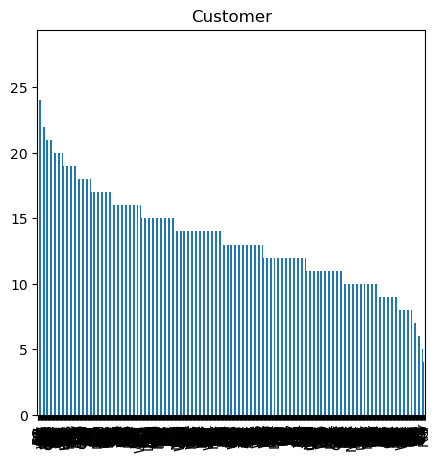

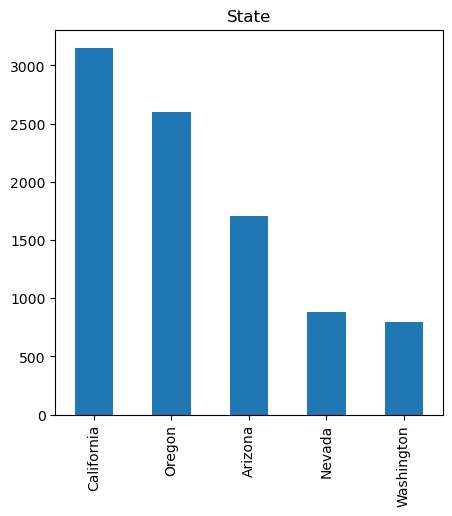

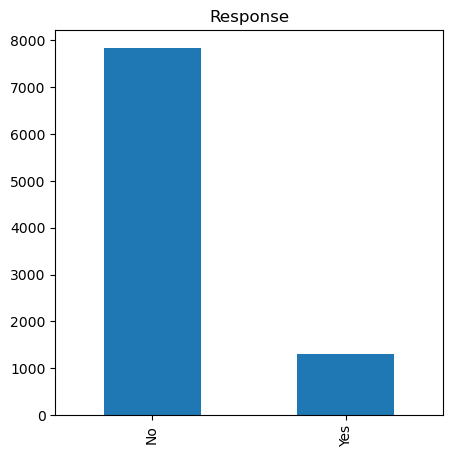

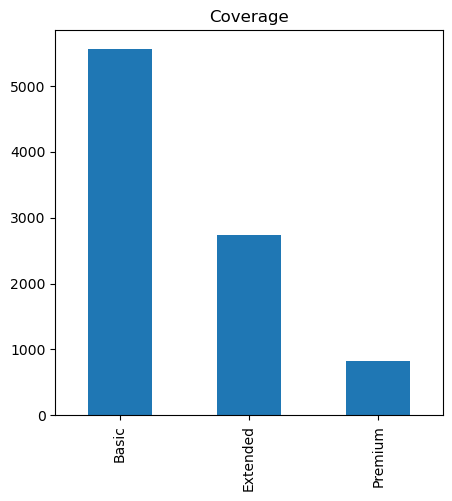

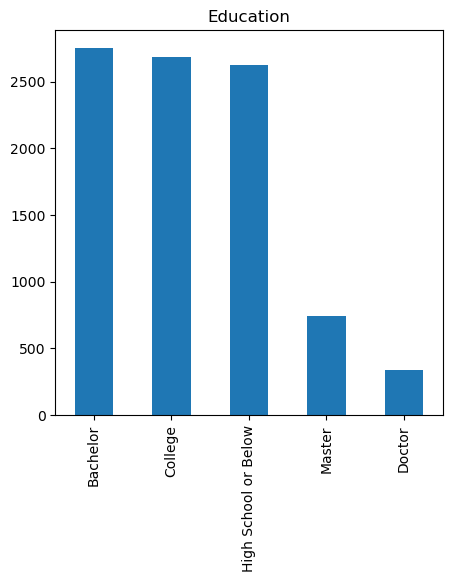

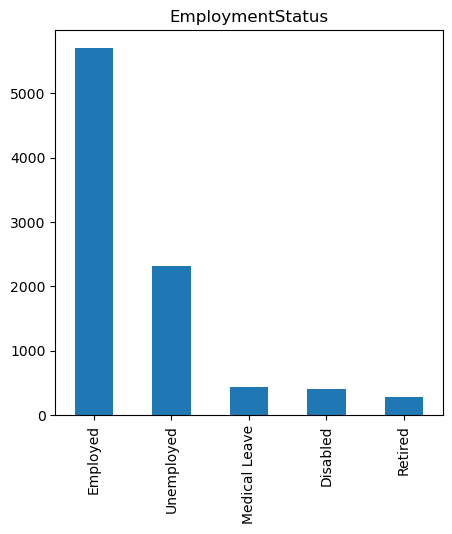

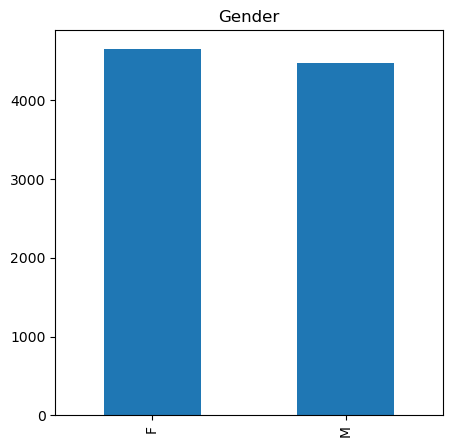

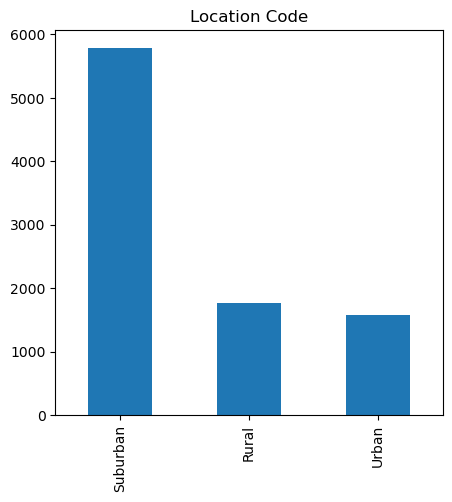

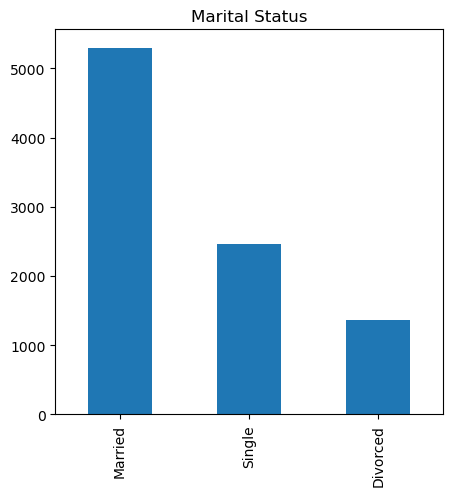

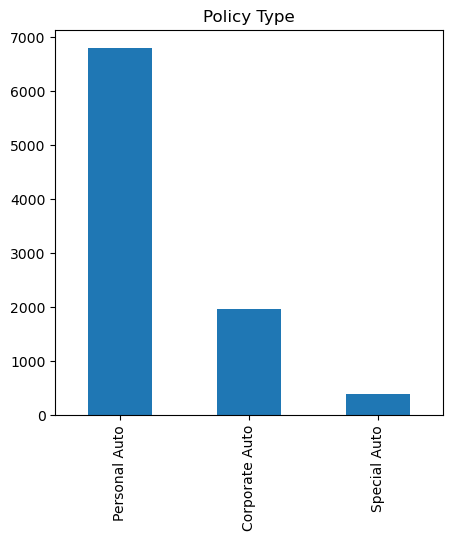

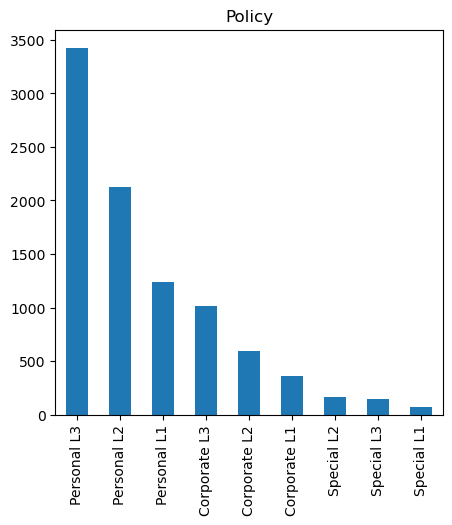

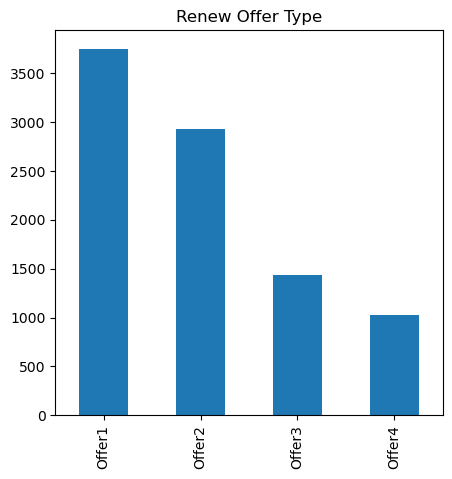

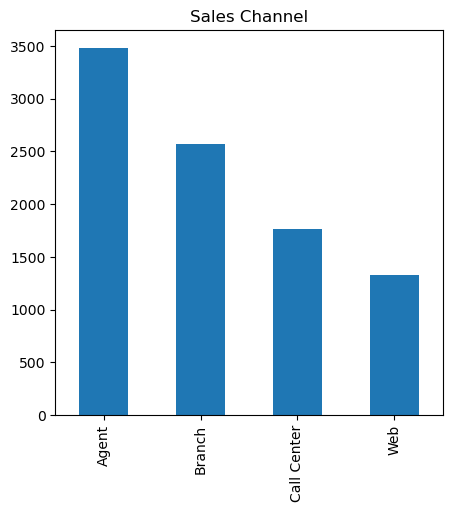

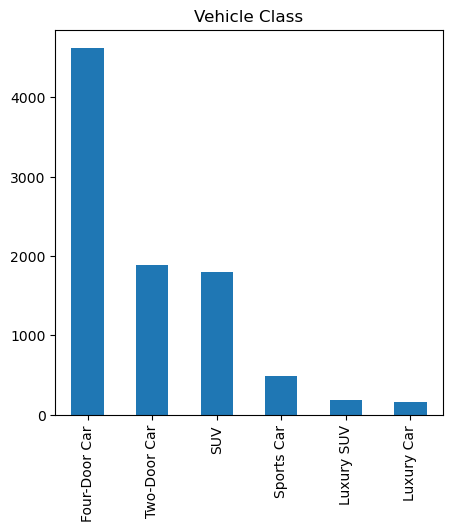

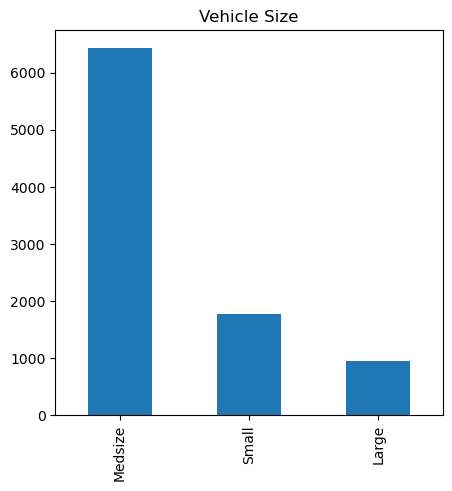

In [44]:
for column in data.select_dtypes(include=['object']):
    plt.figure()
    data[column].value_counts().plot(kind='bar', figsize=(5, 5))
    plt.title(column)
    plt.show()

In [45]:
# 3. We can see that the pattern of the plot's are a skewed right plots.

In [46]:
# 3. "Policy" and "Policy Type" are redundant, so i choose to drop the column with less info which is "Policy"

In [47]:
data = data.drop('Policy', axis=1, inplace=False)

In [48]:
data.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,QZ,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,AI,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,WW,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,HB,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [49]:
column_effective_to_date = pd.read_csv("column_effective_to_date.csv")
data = pd.concat([column_effective_to_date, data],axis=1)

In [50]:
data.head()

,Unnamed: 0,effective_to_date,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,0,2011-02-24,BU,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,1,2011-01-31,QZ,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,2,2011-02-19,AI,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,3,2011-01-20,WW,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,4,2011-02-03,HB,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [51]:
data = data.drop(['Unnamed: 0'],axis = 1, inplace = False)

In [52]:
data.head()

,effective_to_date,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2011-02-24,BU,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,2011-01-31,QZ,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,2011-02-19,AI,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,2011-01-20,WW,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,2011-02-03,HB,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [54]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [56]:
data.dtypes

effective_to_date    datetime64[ns]
Customer                     object
State                        object
Response                     object
Coverage                     object
Education                    object
EmploymentStatus             object
Gender                       object
Location Code                object
Marital Status               object
Policy Type                  object
Renew Offer Type             object
Sales Channel                object
Vehicle Class                object
Vehicle Size                 object
dtype: object

In [57]:
data['month'] = data['effective_to_date'].dt.month
data['year'] = data['effective_to_date'].dt.year

In [58]:
data.head()

,effective_to_date,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,month,year
0,2011-02-24,BU,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,2,2011
1,2011-01-31,QZ,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,1,2011
2,2011-02-19,AI,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,2,2011
3,2011-01-20,WW,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,1,2011
4,2011-02-03,HB,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,2,2011
